# Prolexitim Detector (DProlex v3)
## Binary Classifiers (Alex / NoAlex) using classical and word vector techniques
### Dataset from Prolexitim TAS-20 Spain, Prolexitim NLP and Spanish 3Billion Word2Vec
<hr>
June 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>
Spanish Word Vectors from: <a taget="_blank" href="https://github.com/aitoralmeida/spanish_word2vec">Spanish 3B Pre-trained Word2Vec</a>

## Load Word Vectors and Documents (texts + labels)
- Word Vectors are obtained from the pre-trained Spanish 3B Word2Vec.
- Documents are obtained from the Prolexitim Pilot Study.
    - Text are narratives from Prolexitim NLP. 
    - Labels are categorical values from Prolexitim TAS-20.


### Loading the word vectors

In [1]:
from gensim.models import KeyedVectors

In [2]:
# My copy of Spanish 3 Billion Word2Vec
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [3]:
# Testing Word Vectors for Spanish
word_vectors.most_similar("niño")

[('chiquillo', 0.863490104675293),
 ('bebé', 0.85056471824646),
 ('crío', 0.842483401298523),
 ('muchacho', 0.7765985727310181),
 ('niñito', 0.7588649988174438),
 ('chico', 0.75837242603302),
 ('cachorro', 0.7369438409805298),
 ('muchachito', 0.7227176427841187),
 ('gatito', 0.6718686819076538),
 ('hombre', 0.6658662557601929)]

In [4]:
# Testing Word Vectors for Spanish
word_vectors.get_vector("niño")

memmap([-9.8019737e-01,  3.7916845e-01, -1.6284896e+00,  7.4026036e-01,
         6.7275375e-01, -1.6113833e+00, -1.4873409e+00,  1.6933979e+00,
         3.0024448e-01,  6.1126029e-01, -1.7352545e+00,  2.5489315e-01,
        -7.4795651e-01,  1.0910559e+00, -2.1026888e+00, -4.4130564e+00,
         4.2894289e-01,  1.0395617e+00,  1.6460708e+00,  1.0484180e+00,
         1.4824442e+00,  1.6438122e+00, -2.7626188e+00,  9.5058024e-01,
         8.9740849e-01,  1.6531191e+00, -1.2386736e+00,  1.6032706e+00,
        -2.3379698e+00,  7.8928012e-01,  2.1672912e+00, -9.9437529e-01,
        -2.5328231e+00,  3.1492624e-01,  1.5492657e-01, -8.9571148e-02,
         3.7125247e+00, -1.0850103e+00, -1.0432119e+00, -2.8284986e+00,
        -2.1611533e+00,  3.6355894e+00, -2.8690529e+00, -1.6870648e-01,
        -4.2504200e-01,  2.8080521e+00,  4.1607413e+00,  2.0719736e+00,
        -9.5222074e-01,  1.1894293e+00,  1.0287092e+00, -2.3548654e-01,
        -1.3844434e+00,  2.4121676e-01,  9.0101380e-03,  1.02651

In [6]:
# Testing Word Vectors for Spanish
word_vectors.similar_by_vector(word_vectors.get_vector("niño") - word_vectors.get_vector("niña"))

[('individuo', 0.5064163208007812),
 ('hombre', 0.4954623878002167),
 ('muchacho', 0.4840112328529358),
 ('úrgalo', 0.47156092524528503),
 ('niño', 0.47056442499160767),
 ('hombredios', 0.46997901797294617),
 ('chiquillo', 0.4607599079608917),
 ('hom\xadbre', 0.46047237515449524),
 ('ejército…', 0.45903706550598145),
 ('gyorn', 0.44549915194511414)]

### Loading Prolexitim TAS-20 + NLP Dataset Load

In [7]:
import pandas as pd 

In [14]:
# My copy of Prolexitim join tables with TAS-20 categorical label and narratives from Prolexitim NLP
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-merged-1.3.csv"

In [29]:
docs_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [30]:
# We're only intereted in the Spanish text and the corresponding Alexithymia label
docs_df = docs_df.dropna()
docs_df = docs_df[['Text', 'alex-a']]
docs_df.columns = ['Text', 'AlexLabel']
docs_df.sample(n=6)

,Text,AlexLabel
303,Obreros adescando tras un lardo día de arar la...,Alex
101,Un hombre que tuvo que matar con mucha pena a ...,NoAlex
256,Erase una vez una cascada encantada que llevab...,NoAlex
150,un niño al que sus padres de clase acomodada ...,Alex
151,unos tíos que se fueron de juerga y ahora está...,Alex
73,Esta era la historía de un señor anciano en el...,PosAlex


In [31]:
# We have a very unbalance dataset
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,31
NoAlex,240
PosAlex,45


In [33]:
# And we decided to consider both Possible Alexithymia and Alexithymia as the same (Positive) class
docs_df['AlexLabel'] = docs_df['AlexLabel'].apply(lambda x: x.replace('PosAlex', 'Alex'))

In [34]:
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,76
NoAlex,240


## Prepare training data set
- X (independent variable) --> Text (narrative in Spanish)
- y (dependent variable) --> Alexithymia label (Alex/NoAlex)

In [48]:
import numpy as np

In [52]:
X = docs_df['Text'].apply(lambda x: x.split())
y = docs_df['AlexLabel']

X = np.array(X)
y = np.array(y)

In [62]:
print ("Number of examples: %s" % len(y))

Number of examples: 316


## Evaluation Metrics definition

In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score

In [155]:
# Precision detecting the presencen of alexithymia
alex_precision_scorer = make_scorer(precision_score, pos_label='Alex')

# Precision detecting the absence of alexithymia
noalex_precision_scorer = make_scorer(precision_score, pos_label='NoAlex')

# sensitivity for the presence of alexithymia: recall, hit rate, or true positive rate (TPR).
alex_recall_scorer = make_scorer(recall_score, pos_label='Alex')

# sensitivity for the absence of alexithymia: recall, hit rate, or true positive rate (TPR).
noalex_recall_scorer = make_scorer(recall_score, pos_label='NoAlex')

# F1 Score the presence of alexithymia: harmonic mean of precision and sensitivity.
alex_f1_scorer = make_scorer(f1_score, pos_label='Alex')

# F1 Score the absence of alexithymia: harmonic mean of precision and sensitivity.
noalex_f1_scorer = make_scorer(f1_score, pos_label='NoAlex')

In [156]:
# A dataframe to store all evaluation results
col_names =  ['ModelName', 'Accuracy', 'AUC', 'AlexPrecision', 'NoAlexPrecision', 'AlexRecall', 'NoAlexRecall', 'AlexF1', 'NoAlexF1']
eval_df  = pd.DataFrame(columns = col_names)
eval_df

,ModelName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1


## Evaluation helper functions

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [179]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['Alex','NoAlex']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Classifier with Word Counts and Multinomial Naive Bayes

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [66]:
# Multinomial Naive Bayes using vectors with word counts
multinb_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])

In [69]:
cross_val_score(multinb_pipe, X, y, cv=10).mean()

0.7628024193548388

In [134]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [135]:
accuracy = scores['test_score'].mean()
accuracy

0.7628024193548388

In [136]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [137]:
auc = scores['test_score'].mean()
auc

0.5906994047619049

In [138]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)
# Warning messages appear due to no positive Alexithymia predicted samples

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

In [139]:
alex_prec = scores['test_score'].mean()
alex_prec

0.1

In [141]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [142]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7620967741935484

In [150]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [151]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0125

In [152]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [153]:
noalex_recall = scores['test_score'].mean()
noalex_recall

1.0

In [157]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

In [158]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.02222222222222222

In [159]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [160]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.864935064935065

In [162]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Multinomial Naive Bayes", 
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [163]:
eval_df.tail()

,ModelName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes,0.762802,0.590699,0.1,0.762097,0.0125,1.0,0.022222,0.864935


Confusion matrix, without normalization
[[  1  75]
 [  0 240]]


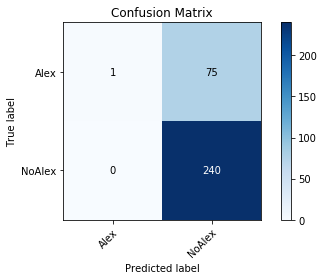

In [187]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(multinb_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

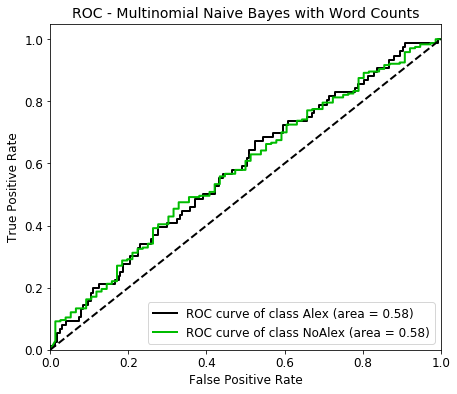

In [204]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(multinb_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Multinomial Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()